
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
key="0d1135967c78f8865e55fac4880286be95745e12"
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pdr.get_data_tiingo('AAPL',start='01-04-2017',end='17-04-2020', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.466825,27.582829,27.402905,27.426579,84472464,0.0,1.0
1,AAPL,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.606503,27.666683,27.417109,27.443151,88774348,0.0,1.0
2,AAPL,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.914268,27.973454,27.573359,27.646749,127007600,0.0,1.0
3,AAPL,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,28.169950,28.274116,27.921370,27.923738,134247792,0.0,1.0
4,AAPL,2017-01-10 00:00:00+00:00,119.11,119.3800,118.30,118.77,24462051,28.198359,28.262279,28.006597,28.117866,97848204,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
822,AAPL,2020-04-13 00:00:00+00:00,273.25,273.70,265.83,268.31,32755731,67.889625,68.001429,66.046108,66.662270,131022924,0.0,1.0
823,AAPL,2020-04-14 00:00:00+00:00,287.05,288.25,278.05,280.00,48748672,71.318269,71.616412,69.082197,69.566679,194994688,0.0,1.0
824,AAPL,2020-04-15 00:00:00+00:00,284.43,286.33,280.63,282.40,32788641,70.667323,71.139383,69.723204,70.162965,131154564,0.0,1.0
825,AAPL,2020-04-16 00:00:00+00:00,286.69,288.20,282.35,287.38,39281290,71.228826,71.603989,70.150542,71.400258,157125160,0.0,1.0
826,AAPL,2020-04-17 00:00:00+00:00,282.80,286.95,276.86,284.69,53812478,70.262346,71.293423,68.786538,70.731921,215249912,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       827 non-null    object 
 1   date         827 non-null    object 
 2   close        827 non-null    float64
 3   high         827 non-null    float64
 4   low          827 non-null    float64
 5   open         827 non-null    float64
 6   volume       827 non-null    int64  
 7   adjClose     827 non-null    float64
 8   adjHigh      827 non-null    float64
 9   adjLow       827 non-null    float64
 10  adjOpen      827 non-null    float64
 11  adjVolume    827 non-null    int64  
 12  divCash      827 non-null    float64
 13  splitFactor  827 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 90.6+ KB


In [ ]:
## Cleaning up the data
df = df.drop(columns=['symbol','high','low','open','volume','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
df.head()

,date,close
0,2017-01-04 00:00:00+00:00,116.02
1,2017-01-05 00:00:00+00:00,116.61
2,2017-01-06 00:00:00+00:00,117.91
3,2017-01-09 00:00:00+00:00,118.99
4,2017-01-10 00:00:00+00:00,119.11


In [ ]:
df.tail()

,date,close
822,2020-04-13 00:00:00+00:00,273.25
823,2020-04-14 00:00:00+00:00,287.05
824,2020-04-15 00:00:00+00:00,284.43
825,2020-04-16 00:00:00+00:00,286.69
826,2020-04-17 00:00:00+00:00,282.80


In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.head()

,close
date,
2017-01-04 00:00:00+00:00,116.02
2017-01-05 00:00:00+00:00,116.61
2017-01-06 00:00:00+00:00,117.91
2017-01-09 00:00:00+00:00,118.99
2017-01-10 00:00:00+00:00,119.11


In [ ]:
df.describe()

,close
count,827.000000
mean,192.310345
std,45.659519
min,116.020000
25%,158.455000
50%,179.980000
75%,213.310000
max,327.200000


## Step 2: Visualize the Data

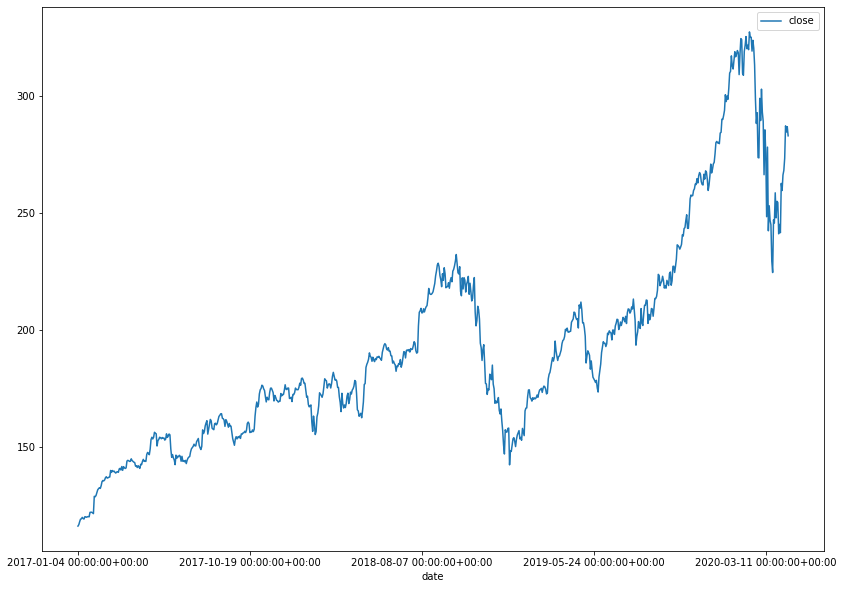

In [ ]:
df.plot(figsize=(14,10))

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['close'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['close'])

ADF Test Statistic : -0.9396493683081583
p-value : 0.7746351416511021
#Lags Used : 21
Number of Observations Used : 805
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Close First Difference'] = df['close'] - df['close'].shift(1)

In [ ]:
df['close'].shift(1)

date
2017-01-04 00:00:00+00:00       NaN
2017-01-05 00:00:00+00:00    116.02
2017-01-06 00:00:00+00:00    116.61
2017-01-09 00:00:00+00:00    117.91
2017-01-10 00:00:00+00:00    118.99
                              ...  
2020-04-13 00:00:00+00:00    267.99
2020-04-14 00:00:00+00:00    273.25
2020-04-15 00:00:00+00:00    287.05
2020-04-16 00:00:00+00:00    284.43
2020-04-17 00:00:00+00:00    286.69
Name: close, Length: 827, dtype: float64

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -5.364017036407723
p-value : 4.029327065126398e-06
#Lags Used : 21
Number of Observations Used : 804
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


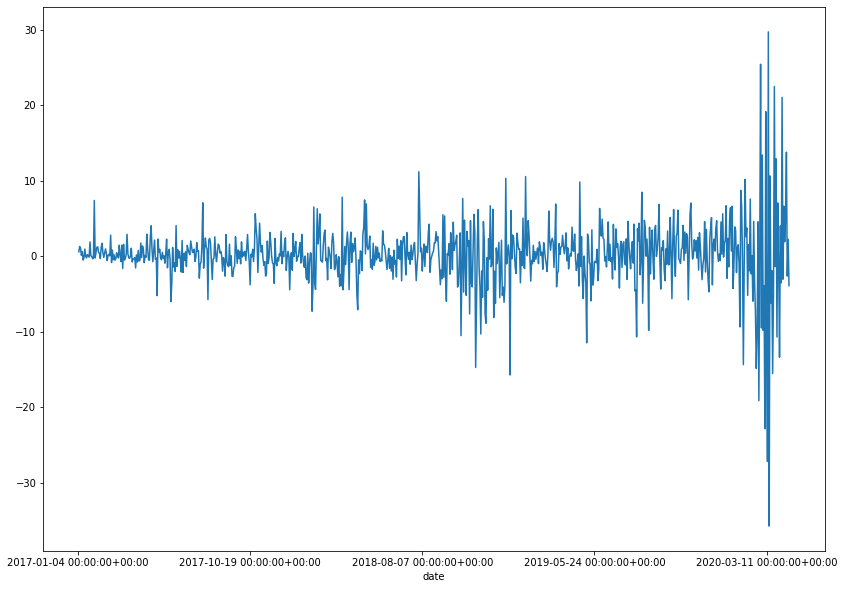

In [ ]:
df['Close First Difference'].plot(figsize=(14,10))

## Auto Regressive Model
![image.png](attachment:image.png)

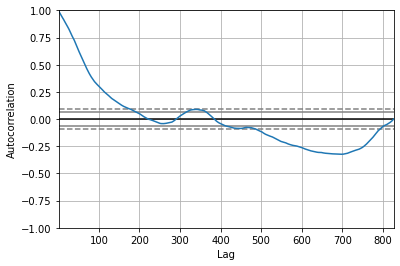

In [ ]:
from pandas.plotting import *
autocorrelation_plot(df['close'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

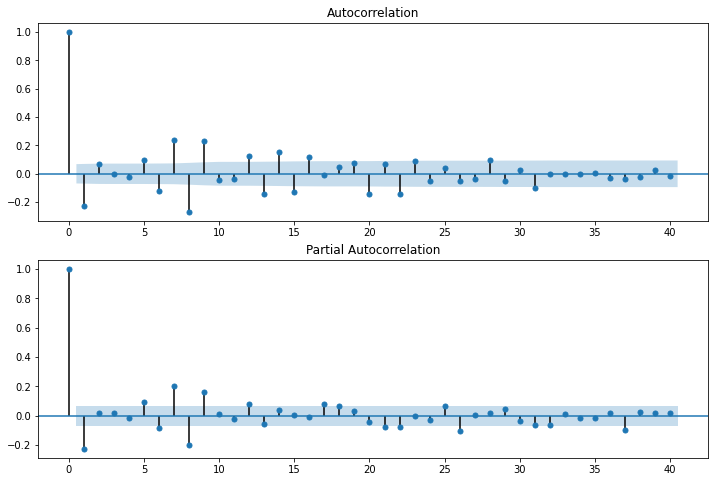

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Close First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Close First Difference'].iloc[2:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['close'],order=(0,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  826
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2350.949
Method:                       css-mle   S.D. of innovations              4.167
Date:                Mon, 18 Jan 2021   AIC                           4707.898
Time:                        19:37:16   BIC                           4722.048
Sample:                             1   HQIC                          4713.325
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2027      0.115      1.762      0.079      -0.023       0.428
ma.L1.D.close    -0.2068      0.032     -6.494      0.000      -0.269      -0.144
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.8362           +0.0000j            4.8362            0.0000
-----------------------------------------------------------------------------
"""

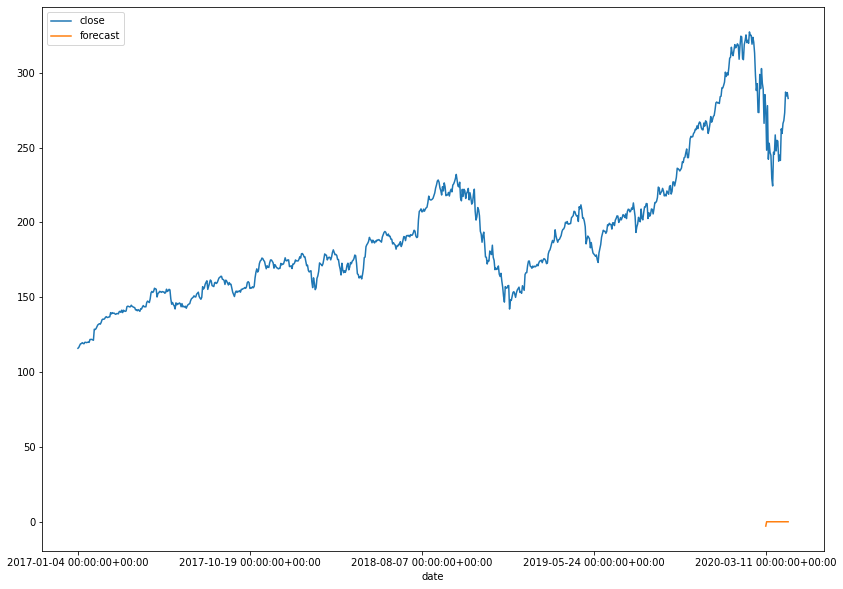

In [ ]:
df['forecast']=model_fit.predict(start=800,end=826,dynamic=True)
df[['close','forecast']].plot(figsize=(14,10))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['close'],order=(0, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit(epochs=2000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


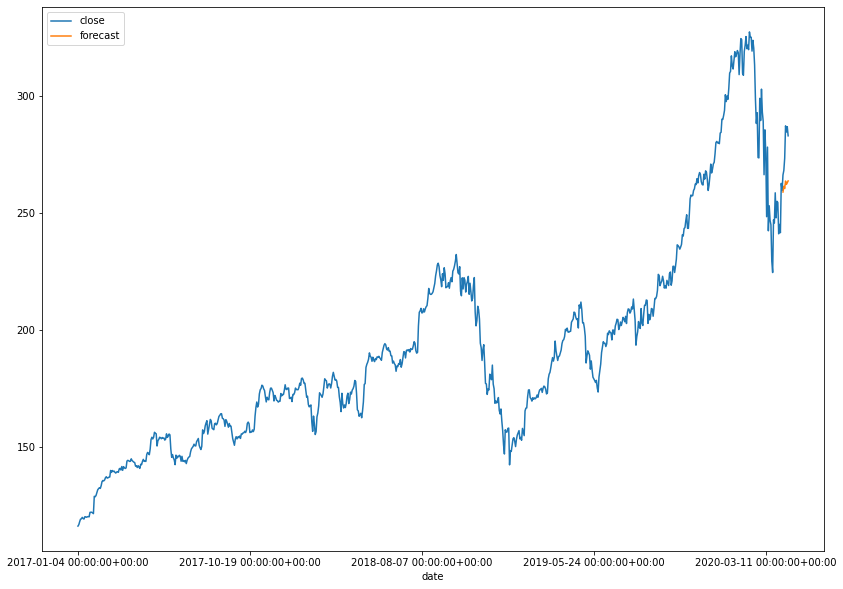

In [ ]:
df['forecast']=results.predict(start=820,end=826,dynamic=True)
df[['close','forecast']].plot(figsize=(14,10))